Name - Sausamya Mitra

Roll No - M22AI627

Problem 3: Chart Image Classification using CNN

In [1]:
#importing the libraries
import numpy as np
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline
import os
import cv2
from keras.layers import Dense, Conv2D, MaxPooling2D, Flatten,GlobalAveragePooling2D
from PIL import Image
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import train_test_split

In [2]:
# Defining the paths to my image and csv folders
train_val_dir = "charts\\train_val"
test_dir = "charts\\test"
train_path_labels = 'charts\\train_val.csv'
train_val_labels = pd.read_csv(train_path_labels)

In [3]:
# loading the training dataset in numpy array
images = []
labels = []
for filename in os.listdir(train_val_dir):
    if filename.endswith('.png'):
        # Load the images and resize them to (128, 128) with 3 color channels
        img = cv2.imread(os.path.join(train_val_dir, filename))
        img = cv2.resize(img, (128, 128))
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        # img = Image.open(os.path.join(train_val_dir, filename))
        img_array = np.array(img)
        # Append the array to the list of images
        images.append(img_array)
        labels.append(filename)
        
        
# Converting the string labels to numerical labels
le = LabelEncoder()
labels = le.fit_transform(labels)
# Convert the lists to NumPy arrays
images = np.array(images)
labels = np.array(labels)
# Save the arrays in NumPy format
np.save('x_train.npy', images)
np.save('y_train.npy', labels)
x_train = np.load('x_train.npy')
y_train = np.load('y_train.npy')

In [4]:
x_train.shape

(1000, 128, 128, 3)

In [5]:
x_train[:5]
y_train[:5]

array([0, 1, 2, 3, 4], dtype=int64)

In [6]:
# loading test dataset in numpy array
images = []
labels = []

for filename in os.listdir(test_dir):
    if filename.endswith('.png'):
        # Loading the images and resizing them to (128, 128) with 3 color channels
        img = cv2.imread(os.path.join(test_dir, filename))
        img = cv2.resize(img, (128, 128))
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        # img = Image.open(os.path.join(test_dir, filename))
        img_array = np.array(img)
        # Appending the array to the list of images
        images.append(img_array)
        labels.append(filename)
        
# Converting the string labels to numerical labels
le = LabelEncoder()
labels = le.fit_transform(labels)
# Converting the lists to NumPy arrays
images = np.array(images)
labels = np.array(labels)
# Saving the arrays in NumPy format
np.save('x_test.npy', images)
np.save('y_test.npy', labels)
x_test = np.load('x_test.npy')
y_test = np.load('y_test.npy')

In [7]:
x_test.shape

(50, 128, 128, 3)

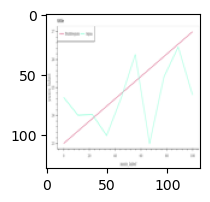

In [8]:
# checking the images loaded
plt.figure(figsize = (10,2))
plt.imshow(x_train[10])
plt.imshow(x_train[208])
plt.imshow(x_train[444])

In [9]:

# defining  classes from the images i have observed
image_classes = ['line', 'dot_line', 'hbar_categorical', 'vbar_categorical', 'pie']
image_classes[0]
# mapping the categories to the labels array i.e y_train
label_map = {'line': 0, 'dot_line': 1, 'hbar_categorical': 2, 'vbar_categorical': 3, 'pie': 4}
y_train = np.array([label_map[label] for label in train_val_labels['type']])
y_train
y_train.shape
y_test.shape

(50,)

In [10]:
# i need to map the lables from csv to the images
# function to test the chart sample

def image_sample(x, y, index):
    plt.figure(figsize = (10,2))
    plt.imshow(x[index])
    # image_label = train_val_labels.iloc[index]['type']
    # plt.xlabel(image_label)
    plt.xlabel(image_classes[y[index]])

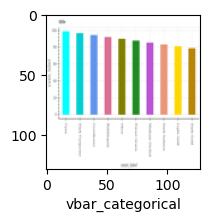

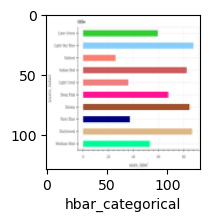

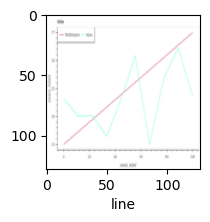

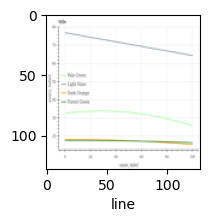

In [11]:
image_sample(x_train,y_train,0)
image_sample(x_train,y_train,208)
image_sample(x_train,y_train,444)
image_sample(x_train,y_train,500)

In [12]:
# now we have mapped the corresponding labels to the image

In [13]:
# normalize the image
# x_train[0]/255
x_train=x_train /255
x_test=x_test /255
print("x_train shape:", x_train.shape)
print("x_test shape:", x_test.shape)

x_train shape: (1000, 128, 128, 3)
x_test shape: (50, 128, 128, 3)


In [14]:
x_test.shape

(50, 128, 128, 3)

In [15]:
# take the label for train data from csv file
y_train_index = train_val_labels['image_index']
y_train_type = train_val_labels['type']

In [16]:
y_train_type[:5]

0    vbar_categorical
1    vbar_categorical
2    vbar_categorical
3    vbar_categorical
4    vbar_categorical
Name: type, dtype: object

In [17]:
# writing a simple nn to test first
# Define the model architecture
model = Sequential([
    Flatten(input_shape=(128,128,3)),
    Dense(3000, activation='relu'),
    Dense(1000, activation='relu'),
    Dense(5, activation='softmax')
    ])


In [18]:
# Compiling the model
model.compile(optimizer='SGD', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.fit(x_train,y_train,epochs=10)

Epoch 1/10
32/32 [==============================] - 26s 735ms/step - loss: 8.0312 - accuracy: 0.2180
Epoch 2/10
32/32 [==============================] - 21s 652ms/step - loss: 1.6298 - accuracy: 0.2160
Epoch 3/10
32/32 [==============================] - 21s 648ms/step - loss: 1.6240 - accuracy: 0.2600
Epoch 4/10
32/32 [==============================] - 21s 646ms/step - loss: 1.6356 - accuracy: 0.2030
Epoch 5/10
32/32 [==============================] - 21s 653ms/step - loss: 1.5930 - accuracy: 0.2760
Epoch 6/10
32/32 [==============================] - 21s 656ms/step - loss: 1.5892 - accuracy: 0.2800
Epoch 7/10
32/32 [==============================] - 21s 644ms/step - loss: 1.5798 - accuracy: 0.2670
Epoch 8/10
32/32 [==============================] - 21s 642ms/step - loss: 1.6429 - accuracy: 0.2420
Epoch 9/10
32/32 [==============================] - 21s 647ms/step - loss: 1.6139 - accuracy: 0.1970
Epoch 10/10
32/32 [==============================] - 21s 645ms/step - loss: 1.6525 - accura

In [19]:
# Split the training images and labels into training and validation sets
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x_train, y_train, test_size=0.2, random_state=42)

In [20]:
model.evaluate(x_test,y_test)

7/7 [==============================] - 1s 112ms/step - loss: 1.6128 - accuracy: 0.1650


[1.6127749681472778, 0.16500000655651093]

In [21]:
y_pred = model.predict(x_test)
y_pred
y_pred_classes = [np.argmax(ele) for ele in y_pred]
# print("classificaton report : \n",classification_report(y_test,y_pred_classes))

7/7 [==============================] - 1s 97ms/step


In [22]:
# here we see the accuracy is very low and we need to modify our nn to add more layers for better accuracy


In [23]:
# Print the shapes of the arrays to verify that they loaded correctly
print("Train Images Shape:", x_train.shape)
print("Train Labels Shape:", y_train.shape)
print("Test Images Shape:", x_test.shape)
print("Test Labels Shape:", y_test.shape)

Train Images Shape: (800, 128, 128, 3)
Train Labels Shape: (800,)
Test Images Shape: (200, 128, 128, 3)
Test Labels Shape: (200,)


In [51]:
# modify the model architecture to cnn
cnn_model = Sequential([
    Conv2D(filters=16 ,kernel_size=(3,3), activation='relu', input_shape=(128,128,3)),
    MaxPooling2D(pool_size=(2,2)),
    Conv2D(32, (3,3), activation='relu'),
    MaxPooling2D(pool_size=(2,2)),
    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D(pool_size=(2,2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(5, activation='softmax')
    ])

# Compile the model
cnn_model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = cnn_model.fit(x_train, y_train, batch_size=1000, epochs=50,validation_data=(x_test, y_test))




Epoch 1/50


ResourceExhaustedError: Graph execution error:

Detected at node 'sequential_2/conv2d_33/Relu' defined at (most recent call last):
    File "C:\Users\SAUSAMYA MITRA\Python_Anaconda_Setup\lib\runpy.py", line 196, in _run_module_as_main
      return _run_code(code, main_globals, None,
    File "C:\Users\SAUSAMYA MITRA\Python_Anaconda_Setup\lib\runpy.py", line 86, in _run_code
      exec(code, run_globals)
    File "C:\Users\SAUSAMYA MITRA\Python_Anaconda_Setup\lib\site-packages\ipykernel_launcher.py", line 17, in <module>
      app.launch_new_instance()
    File "C:\Users\SAUSAMYA MITRA\Python_Anaconda_Setup\lib\site-packages\traitlets\config\application.py", line 992, in launch_instance
      app.start()
    File "C:\Users\SAUSAMYA MITRA\Python_Anaconda_Setup\lib\site-packages\ipykernel\kernelapp.py", line 711, in start
      self.io_loop.start()
    File "C:\Users\SAUSAMYA MITRA\Python_Anaconda_Setup\lib\site-packages\tornado\platform\asyncio.py", line 199, in start
      self.asyncio_loop.run_forever()
    File "C:\Users\SAUSAMYA MITRA\Python_Anaconda_Setup\lib\asyncio\base_events.py", line 603, in run_forever
      self._run_once()
    File "C:\Users\SAUSAMYA MITRA\Python_Anaconda_Setup\lib\asyncio\base_events.py", line 1906, in _run_once
      handle._run()
    File "C:\Users\SAUSAMYA MITRA\Python_Anaconda_Setup\lib\asyncio\events.py", line 80, in _run
      self._context.run(self._callback, *self._args)
    File "C:\Users\SAUSAMYA MITRA\Python_Anaconda_Setup\lib\site-packages\ipykernel\kernelbase.py", line 510, in dispatch_queue
      await self.process_one()
    File "C:\Users\SAUSAMYA MITRA\Python_Anaconda_Setup\lib\site-packages\ipykernel\kernelbase.py", line 499, in process_one
      await dispatch(*args)
    File "C:\Users\SAUSAMYA MITRA\Python_Anaconda_Setup\lib\site-packages\ipykernel\kernelbase.py", line 406, in dispatch_shell
      await result
    File "C:\Users\SAUSAMYA MITRA\Python_Anaconda_Setup\lib\site-packages\ipykernel\kernelbase.py", line 729, in execute_request
      reply_content = await reply_content
    File "C:\Users\SAUSAMYA MITRA\Python_Anaconda_Setup\lib\site-packages\ipykernel\ipkernel.py", line 411, in do_execute
      res = shell.run_cell(
    File "C:\Users\SAUSAMYA MITRA\Python_Anaconda_Setup\lib\site-packages\ipykernel\zmqshell.py", line 531, in run_cell
      return super().run_cell(*args, **kwargs)
    File "C:\Users\SAUSAMYA MITRA\Python_Anaconda_Setup\lib\site-packages\IPython\core\interactiveshell.py", line 2961, in run_cell
      result = self._run_cell(
    File "C:\Users\SAUSAMYA MITRA\Python_Anaconda_Setup\lib\site-packages\IPython\core\interactiveshell.py", line 3016, in _run_cell
      result = runner(coro)
    File "C:\Users\SAUSAMYA MITRA\Python_Anaconda_Setup\lib\site-packages\IPython\core\async_helpers.py", line 129, in _pseudo_sync_runner
      coro.send(None)
    File "C:\Users\SAUSAMYA MITRA\Python_Anaconda_Setup\lib\site-packages\IPython\core\interactiveshell.py", line 3221, in run_cell_async
      has_raised = await self.run_ast_nodes(code_ast.body, cell_name,
    File "C:\Users\SAUSAMYA MITRA\Python_Anaconda_Setup\lib\site-packages\IPython\core\interactiveshell.py", line 3400, in run_ast_nodes
      if await self.run_code(code, result, async_=asy):
    File "C:\Users\SAUSAMYA MITRA\Python_Anaconda_Setup\lib\site-packages\IPython\core\interactiveshell.py", line 3460, in run_code
      exec(code_obj, self.user_global_ns, self.user_ns)
    File "C:\Users\SAUSAMYA MITRA\AppData\Local\Temp\ipykernel_7316\3176572434.py", line 18, in <module>
      history = cnn_model.fit(x_train, y_train, batch_size=1000, epochs=50,validation_data=(x_test, y_test))
    File "C:\Users\SAUSAMYA MITRA\Python_Anaconda_Setup\lib\site-packages\keras\utils\traceback_utils.py", line 65, in error_handler
      return fn(*args, **kwargs)
    File "C:\Users\SAUSAMYA MITRA\Python_Anaconda_Setup\lib\site-packages\keras\engine\training.py", line 1685, in fit
      tmp_logs = self.train_function(iterator)
    File "C:\Users\SAUSAMYA MITRA\Python_Anaconda_Setup\lib\site-packages\keras\engine\training.py", line 1284, in train_function
      return step_function(self, iterator)
    File "C:\Users\SAUSAMYA MITRA\Python_Anaconda_Setup\lib\site-packages\keras\engine\training.py", line 1268, in step_function
      outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "C:\Users\SAUSAMYA MITRA\Python_Anaconda_Setup\lib\site-packages\keras\engine\training.py", line 1249, in run_step
      outputs = model.train_step(data)
    File "C:\Users\SAUSAMYA MITRA\Python_Anaconda_Setup\lib\site-packages\keras\engine\training.py", line 1050, in train_step
      y_pred = self(x, training=True)
    File "C:\Users\SAUSAMYA MITRA\Python_Anaconda_Setup\lib\site-packages\keras\utils\traceback_utils.py", line 65, in error_handler
      return fn(*args, **kwargs)
    File "C:\Users\SAUSAMYA MITRA\Python_Anaconda_Setup\lib\site-packages\keras\engine\training.py", line 558, in __call__
      return super().__call__(*args, **kwargs)
    File "C:\Users\SAUSAMYA MITRA\Python_Anaconda_Setup\lib\site-packages\keras\utils\traceback_utils.py", line 65, in error_handler
      return fn(*args, **kwargs)
    File "C:\Users\SAUSAMYA MITRA\Python_Anaconda_Setup\lib\site-packages\keras\engine\base_layer.py", line 1145, in __call__
      outputs = call_fn(inputs, *args, **kwargs)
    File "C:\Users\SAUSAMYA MITRA\Python_Anaconda_Setup\lib\site-packages\keras\utils\traceback_utils.py", line 96, in error_handler
      return fn(*args, **kwargs)
    File "C:\Users\SAUSAMYA MITRA\Python_Anaconda_Setup\lib\site-packages\keras\engine\sequential.py", line 412, in call
      return super().call(inputs, training=training, mask=mask)
    File "C:\Users\SAUSAMYA MITRA\Python_Anaconda_Setup\lib\site-packages\keras\engine\functional.py", line 512, in call
      return self._run_internal_graph(inputs, training=training, mask=mask)
    File "C:\Users\SAUSAMYA MITRA\Python_Anaconda_Setup\lib\site-packages\keras\engine\functional.py", line 669, in _run_internal_graph
      outputs = node.layer(*args, **kwargs)
    File "C:\Users\SAUSAMYA MITRA\Python_Anaconda_Setup\lib\site-packages\keras\utils\traceback_utils.py", line 65, in error_handler
      return fn(*args, **kwargs)
    File "C:\Users\SAUSAMYA MITRA\Python_Anaconda_Setup\lib\site-packages\keras\engine\base_layer.py", line 1145, in __call__
      outputs = call_fn(inputs, *args, **kwargs)
    File "C:\Users\SAUSAMYA MITRA\Python_Anaconda_Setup\lib\site-packages\keras\utils\traceback_utils.py", line 96, in error_handler
      return fn(*args, **kwargs)
    File "C:\Users\SAUSAMYA MITRA\Python_Anaconda_Setup\lib\site-packages\keras\layers\convolutional\base_conv.py", line 321, in call
      return self.activation(outputs)
    File "C:\Users\SAUSAMYA MITRA\Python_Anaconda_Setup\lib\site-packages\keras\activations.py", line 317, in relu
      return backend.relu(
    File "C:\Users\SAUSAMYA MITRA\Python_Anaconda_Setup\lib\site-packages\keras\backend.py", line 5396, in relu
      x = tf.nn.relu(x)
Node: 'sequential_2/conv2d_33/Relu'
OOM when allocating tensor with shape[800,126,126,16] and type float on /job:localhost/replica:0/task:0/device:CPU:0 by allocator cpu
	 [[{{node sequential_2/conv2d_33/Relu}}]]
Hint: If you want to see a list of allocated tensors when OOM happens, add report_tensor_allocations_upon_oom to RunOptions for current allocation info. This isn't available when running in Eager mode.
 [Op:__inference_train_function_9706]

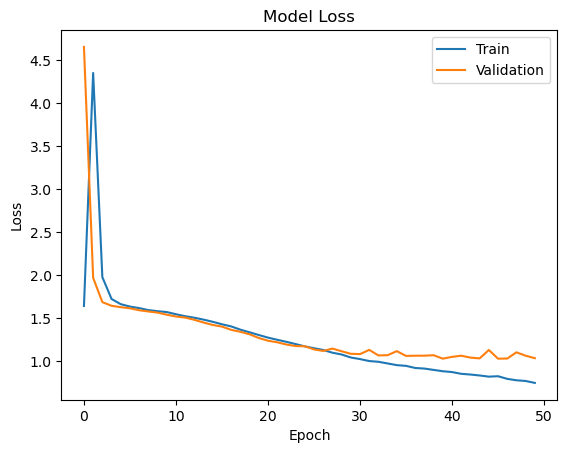

In [50]:
# Plot the obtained loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()

In [25]:
cnn_model.evaluate(x_test,y_test)

7/7 [==============================] - 0s 39ms/step - loss: 1.0320 - accuracy: 0.6150


[1.0319782495498657, 0.6150000095367432]

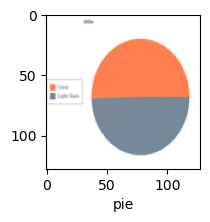

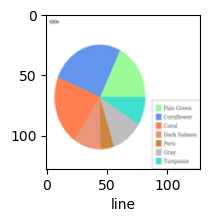

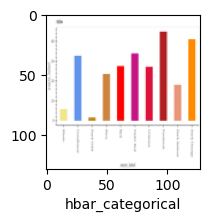

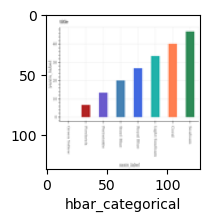

In [26]:
image_sample(x_test,y_test,1)
image_sample(x_test,y_test,50)
image_sample(x_test,y_test,25)
image_sample(x_test,y_test,30)

Observation - we can see some wrong predictions

In [28]:
y_pred = cnn_model.predict(x_test)
y_pred[:5]

7/7 [==============================] - 0s 40ms/step


array([[4.7561935e-01, 2.5021705e-01, 1.9369833e-01, 2.4141474e-02,
        5.6323778e-02],
       [2.7766171e-01, 4.3662833e-03, 1.2875199e-03, 3.6525045e-02,
        6.8015945e-01],
       [5.8886147e-01, 5.2606163e-04, 8.5344759e-04, 6.4125820e-03,
        4.0334645e-01],
       [6.4377910e-01, 5.3598318e-04, 1.6397096e-03, 5.7242792e-03,
        3.4832087e-01],
       [5.9020346e-01, 1.5224531e-01, 1.9091818e-01, 1.7037408e-02,
        4.9595594e-02]], dtype=float32)

In [29]:
y_classes = [np.argmax(element) for element in y_pred]
y_classes[:5]

[0, 4, 0, 0, 0]

In [30]:
y_test[:5]

array([0, 4, 4, 4, 0])

In [31]:
# here we see some values are not matching

'dot_line'

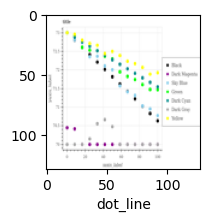

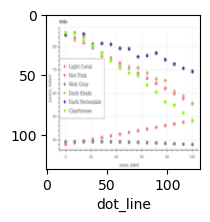

In [49]:
# testing actual and predicted
#image_sample(x_test,y_test,1) #actual
#image_classes[y_classes[1]] #predicted
image_sample(x_test,y_test,10) #actual
image_classes[y_classes[10]] #predicted
image_sample(x_test,y_test,15) #actual
image_classes[y_classes[15]] #predicted

In [34]:
# some values are not matching

In [35]:
print("classification report: \n", classification_report(y_test,y_classes))

classification report: 
               precision    recall  f1-score   support

           0       0.43      0.62      0.51        37
           1       0.83      0.66      0.73        44
           2       0.66      0.56      0.61        48
           3       0.54      0.58      0.56        33
           4       0.71      0.66      0.68        38

    accuracy                           0.61       200
   macro avg       0.63      0.62      0.62       200
weighted avg       0.64      0.61      0.62       200



In [36]:
# Generate the confusion matrix
conf_mat = confusion_matrix(y_test, y_classes)
print('Confusion Matrix:')
print(conf_mat)

Confusion Matrix:
[[23  5  1  2  6]
 [12 29  0  1  2]
 [11  0 27 10  0]
 [ 0  1 11 19  2]
 [ 8  0  2  3 25]]


Text(95.72222222222221, 0.5, 'Actual')

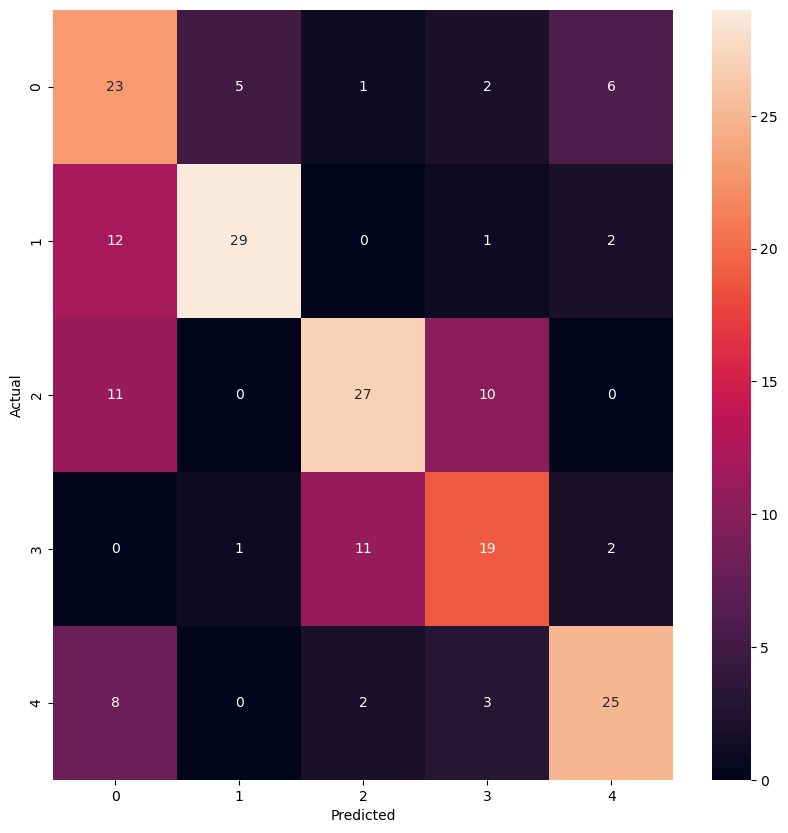

In [37]:
# Plot the confusion matrix
import seaborn as sn
plt.figure(figsize = (10,10))
sn.heatmap(conf_mat,annot=True,fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Actual')

Observation - for 50 iterations, we can see some promising accuracy, more training will be required for better accuracy
and in the confusion matrix, whatever is not in diagonal is a error

Implementation of Alex Net for fine tune

In [48]:
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.models import Model
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Define input shape
input_shape = (227, 227, 3)

# Define the model architecture
inputs = Input(shape=input_shape)
x = Conv2D(96, (11, 11), strides=(4, 4), activation='relu')(inputs)
x = MaxPooling2D((3, 3), strides=(2, 2))(x)
x = Conv2D(256, (5, 5), strides=(1, 1), padding='same', activation='relu')(x)
x = MaxPooling2D((3, 3), strides=(2, 2))(x)
x = Conv2D(384, (3, 3), strides=(1, 1), padding='same', activation='relu')(x)
x = Conv2D(384, (3, 3), strides=(1, 1), padding='same', activation='relu')(x)
x = Conv2D(256, (3, 3), strides=(1, 1), padding='same', activation='relu')(x)
x = MaxPooling2D((3, 3), strides=(2, 2))(x)
x = Flatten()(x)
x = Dense(4096, activation='relu')(x)
x = Dropout(0.5)(x)
x = Dense(4096, activation='relu')(x)
x = Dropout(0.5)(x)
predictions = Dense(5, activation='softmax')(x)

# Create the model
alexnet_model = Model(inputs=inputs, outputs=predictions)

# Freeze the weights of all layers except the new classification layer
for layer in alexnet_model.layers[:-4]:
    layer.trainable = False

# Compile the model with categorical crossentropy loss and Adam optimizer
alexnet_model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Print the summary of the model architecture
alexnet_model.summary()

# Set up data generators for image augmentation and feeding data to the model
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest')

test_datagen = ImageDataGenerator(rescale=1./255)

# flow method generates batches of augmented data
train_generator = train_datagen.flow(x_train, y_train, batch_size=32)
test_generator = train_datagen.flow(x_test, y_test, batch_size=32)


Model: "model_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_6 (InputLayer)        [(None, 227, 227, 3)]     0         
                                                                 
 conv2d_28 (Conv2D)          (None, 55, 55, 96)        34944     
                                                                 
 max_pooling2d_18 (MaxPoolin  (None, 27, 27, 96)       0         
 g2D)                                                            
                                                                 
 conv2d_29 (Conv2D)          (None, 27, 27, 256)       614656    
                                                                 
 max_pooling2d_19 (MaxPoolin  (None, 13, 13, 256)      0         
 g2D)                                                            
                                                                 
 conv2d_30 (Conv2D)          (None, 13, 13, 384)       8851

In [ ]:
# Train the model with early stopping
from tensorflow.keras.callbacks import EarlyStopping
es = EarlyStopping(monitor='val_loss', patience=10, verbose=1, mode='min', restore_best_weights=True)
history = alexnet_model.fit(train_generator, epochs=100, validation_data=test_generator, callbacks=[es])

Implementation of VGG16 for fine tune

In [38]:
from tensorflow.keras.applications import VGG16
from tensorflow.keras.preprocessing.image import ImageDataGenerator
# Load the pre-trained model
vgg16_model = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

In [39]:
# Replace the final classification layer with a new layer
x = vgg16_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(128, activation='relu')(x)

predictions = Dense(5, activation='softmax')(x)
pt_model = tf.keras.Model(inputs=vgg16_model.input, outputs=predictions)

In [40]:
# Freeze the weights of all layers except the new classification layer
for layer in pt_model.layers:
    layer.trainable = False

In [41]:
# Compile the model with categorical crossentropy loss and Adam optimizer
pt_model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [42]:
# Print the summary of the model architecture
pt_model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [43]:
# Set up data generators for image augmentation and feeding data to the model
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest')

test_datagen = ImageDataGenerator(rescale=1./255)

In [44]:
# flow method generates batches of augmented data
train_generator = train_datagen.flow(x_train, y_train, batch_size=32)
test_generator = train_datagen.flow(x_test, y_test, batch_size=32)

In [ ]:
# Train the model with early stopping
from tensorflow.keras.callbacks import EarlyStopping
es = EarlyStopping(monitor='val_loss', patience=10, verbose=1, mode='min', restore_best_weights=True)
history = pt_model.fit(train_generator, epochs=100, validation_data=test_generator, callbacks=[es])